In [87]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [88]:
x,y = make_regression(n_samples = 100, n_features = 2, n_informative = 2,n_targets = 1,noise = 50)

In [89]:
df = pd.DataFrame({"feature 1" : x[:,0],"feature 2" : x[:,1], "target" : y})
df.head()

,feature 1,feature 2,target
0,0.761583,0.219730,102.362256
1,-1.299919,0.347237,-46.454276
2,1.518639,1.880908,93.409405
3,-1.298184,0.797863,-45.902193
4,-0.172911,0.702614,11.072896


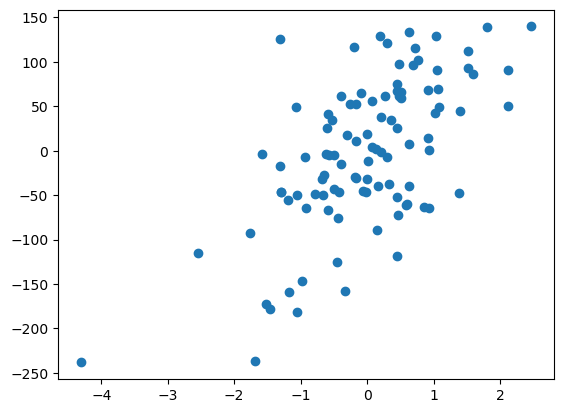

In [90]:
plt.scatter(df["feature 1"],df["target"])

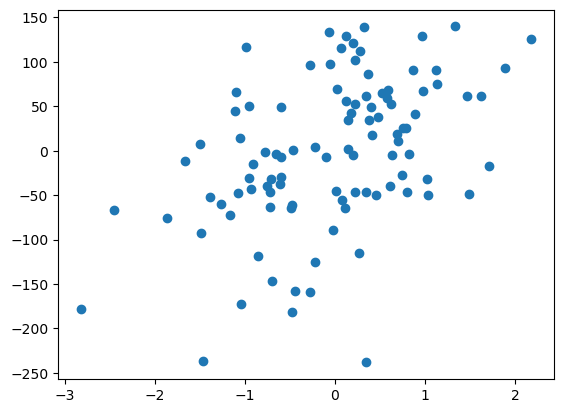

In [91]:
plt.scatter(df["feature 2"],df["target"])

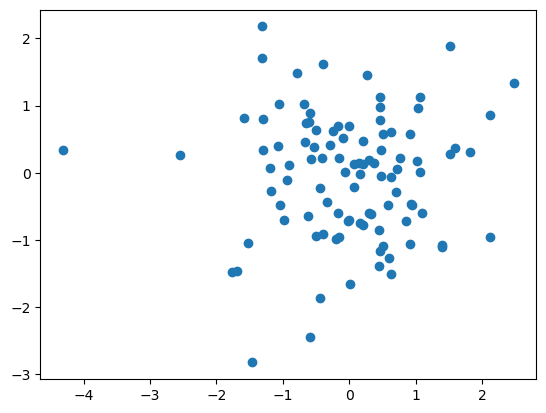

In [92]:
plt.scatter(df["feature 1"],df["feature 2"])

In [93]:
fig = px.scatter_3d(df,x = "feature 1",y = "feature 2",z = "target")
fig.show()

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[["feature 1","feature 2"]],df["target"],random_state = 0)

In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [96]:
lr.fit(x_train,y_train)

LinearRegression()

In [97]:
y_pred = lr.predict(x_test)

In [98]:
print("MAE       : ",mean_absolute_error(y_test,y_pred))
print("MSE       : ",mean_squared_error(y_test,y_pred))
print("R2-Score  : ",r2_score(y_test,y_pred))

MAE       :  46.256162412537584
MSE       :  3854.2014265458706
R2-Score  :  0.533031862454724


In [99]:
x = np.linspace(df["feature 1"].min(), df["feature 1"].max(), 10)
y = np.linspace(df["feature 2"].min(), df["feature 2"].max(), 10)

xGrid, yGrid = np.meshgrid(x, y)

final = np.vstack((xGrid.ravel(), yGrid.ravel())).T

z = lr.predict(final).reshape(10,10)

fig = px.scatter_3d(df, x='feature 1', y='feature 2', z='target')
fig.add_trace(go.Surface(x=x, y=y, z=z))

fig.show()

/home/yash/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [100]:
lr.coef_

array([51.4906868 , 39.82259752])